<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Wine_Quality_Prediction_Final_Answer%E2%80%93_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df0 = pd.read_csv("/content/winequalityN.csv")
df0.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df0.isnull().sum()
df0.shape
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [7]:
#Fill all with  mean
for column in df0.columns:
  if df0[column].isnull().sum()> 0:
    df0[column]= df0[column].fillna(df0[column].mean())
else:
  pass


In [8]:
df0.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#visualize
import matplotlib.pyplot as plt
import matplotlib as mpl


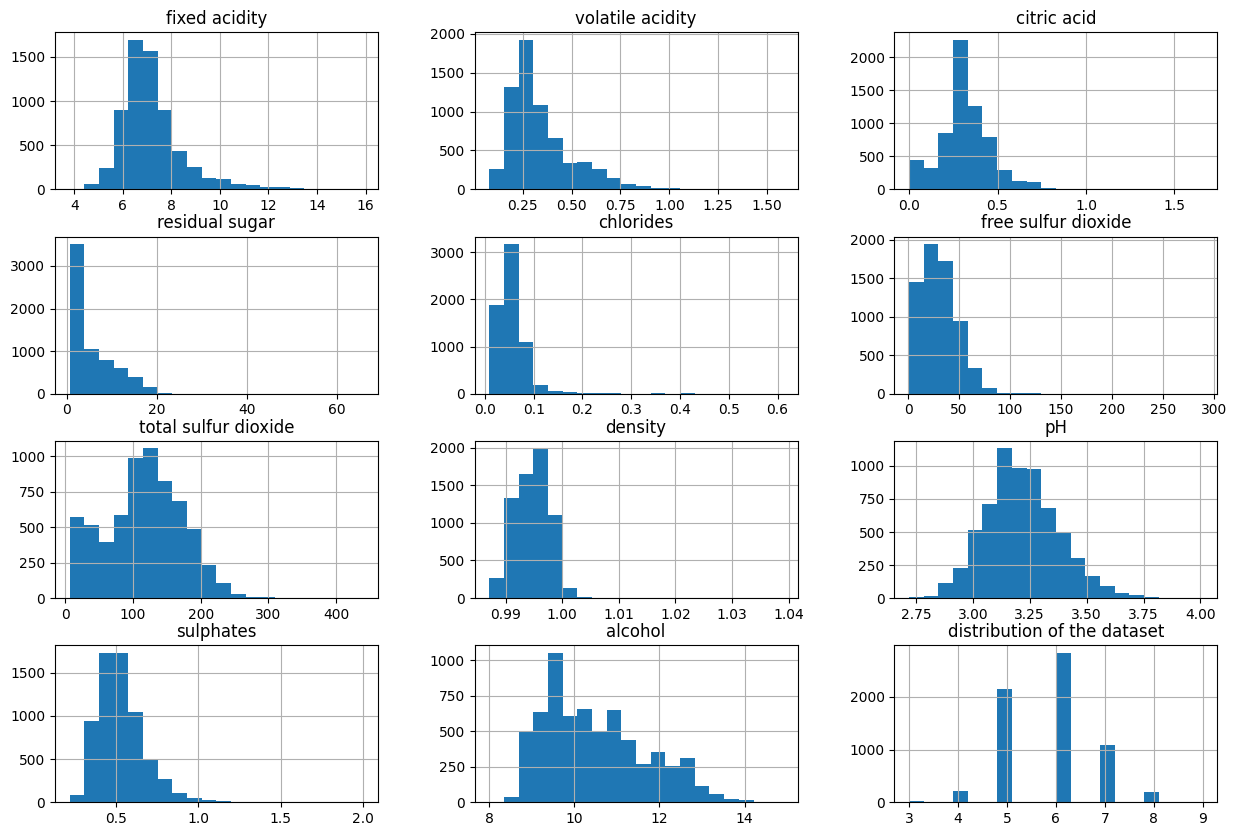

In [10]:
df0.hist(bins = 20, figsize = (15, 10))
plt.title("distribution of the dataset")
plt.legend
plt.show()

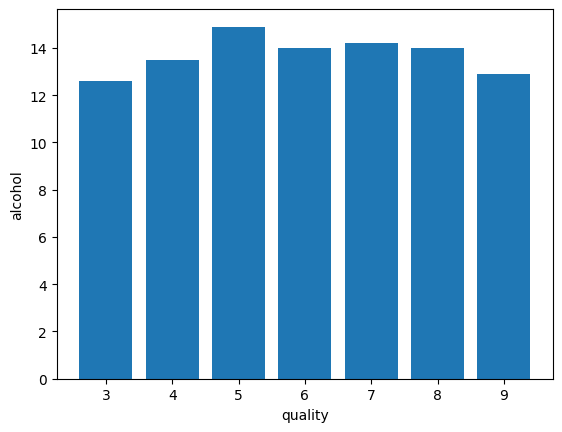

In [13]:
#count plot
plt.bar(df0["quality"], df0["alcohol"],)
plt.xlabel("quality"), plt.ylabel("alcohol")
plt.show()

<ipython-input-15-cacb735d4774>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df0.corr() > 0.7, annot = True, cbar = False)


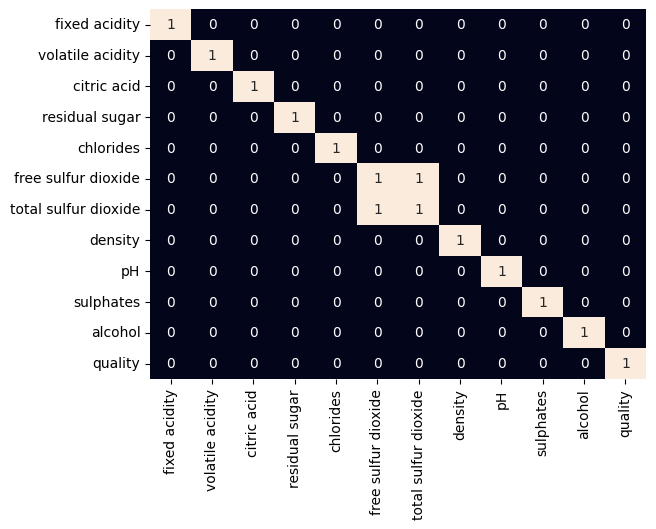

<Figure size 1500x1000 with 0 Axes>

In [15]:
#Plot a heatmap
import seaborn as sb
sb.heatmap(df0.corr() > 0.7, annot = True, cbar = False)
plt.figure(figsize = (15, 10))
plt.show()

As we cann see above, From the above heat map  the ‘total sulphur dioxide’ and ‘free sulphur dioxide‘ are highly correlated features so, we will remove one of them

In [18]:
df1 = df0.drop(columns = "total sulfur dioxide", axis = 1)
df1.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6


<ipython-input-20-a66ca14de06d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df1.corr()>0.7, annot = True, cbar = False)


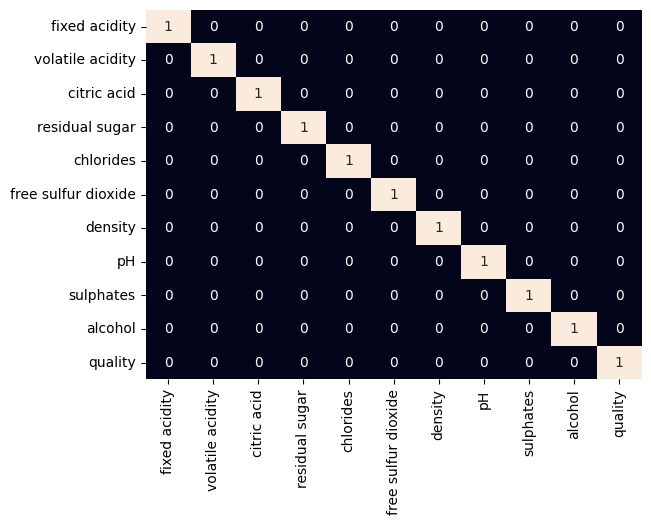

<Figure size 1500x1200 with 0 Axes>

In [20]:
#Let us plot the headmap again
sb.heatmap(df1.corr()>0.7, annot = True, cbar = False)
plt.figure(figsize = (15, 12))
plt.show()

In [22]:
df1.corr().T

<ipython-input-22-dbbd4d0c9472>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr().T


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.025717,-0.145116,-0.188471,-0.179838,0.055463
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,0.011913,1.000000,0.191075,0.120939,0.019356
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,0.259432,0.191075,1.000000,-0.003261,0.038713
alcohol,-0.095560,-0.038215,-0.010431,-0.359656,-0.256844,-0.179838,-0.686745,0.120939,-0.003261,1.000000,0.444319


#Model Development

In [29]:
#Define quality
df1["best quality"] = [1 if x > 5 else 0 for x in df1["quality"]]
df1["best quality"].shape
df0["type"].nunique()
df1["type"].unique()

array(['white', 'red'], dtype=object)

In [31]:
df1.head()
df1.replace({"white": 1, "red": 0}, inplace = True)
df1.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,1,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [49]:
#split the set into training and testing set
features_set = df1.drop(["quality", "best quality"], axis = 1)
#features.head()
labels = df1["best quality"]
labels.head()
#nice nice nice

0    1
1    1
2    1
3    1
4    1
Name: best quality, dtype: int64

In [52]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_set)
df_features_scaled = pd.DataFrame(scaled_features, columns = features_set.columns)
df_features_scaled.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.267785,0.217054,0.129213,0.115942
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.132832,0.449612,0.151685,0.217391
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.154039,0.418605,0.123596,0.304348
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,0.275362
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,0.275362


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, labels, test_size = 0.2, random_state = 42)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (5197, 11)
y_train: (5197,)
X_test: (1300, 11)
y_test: (1300,)


In [55]:
X_train.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
1916,1.0,0.231405,0.113333,0.216867,0.115031,0.059801,0.184028,0.167534,0.279070,0.112360,0.173913
947,1.0,0.388430,0.053333,0.210843,0.015337,0.049834,0.079861,0.123193,0.186047,0.078652,0.289855
877,1.0,0.181818,0.133333,0.204819,0.015337,0.182724,0.111111,0.096202,0.364341,0.089888,0.318841
2927,1.0,0.264463,0.153333,0.186747,0.130368,0.044850,0.152778,0.097359,0.201550,0.050562,0.579710
6063,0.0,0.388430,0.240000,0.301205,0.019939,0.598007,0.048611,0.177945,0.224806,0.494382,0.202899


In [56]:
#Model Selection
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
models = [LogisticRegression(), XGBClassifier(), SVC(kernel = "rbf")]
for i in range(3):
  models[i].fit(X_train, y_train)
  print(f"{models[i]} :")
  training_preds = models[i].predict(X_train)
  testing_preds = models[i].predict(X_test)
  cross_validation_scores = cross_val_score(models[i], X_train, y_train, scoring = "accuracy", cv=3)
  #model_i1_scores = np.sqrt(-cross_validation_scores)
  print(cross_validation_scores)
  #precision and Recall
  print(f"precision score: {precision_score(y_train, training_preds)}")
  print(f"recall  score: {recall_score(y_train, training_preds)}")
  #confusion matrix
  #trining_preds = cross_val_predict(models[i], X_train, y_train)
  from sklearn.metrics import confusion_matrix
  confusion_matrix_scores = confusion_matrix(y_train, training_preds)
  print(f"confusion matrix scores: {confusion_matrix_scores}")
  print(f"roc_auc_score:  {roc_auc_score(y_train, training_preds)}")
  print(f"Validation Accuracy : {roc_auc_score(y_test, testing_preds)}")

LogisticRegression() :
[0.73975765 0.72748268 0.73556582]
precision score: 0.7641586867305061
recall  score: 0.8512648582749162
confusion matrix scores: [[1054  862]
 [ 488 2793]]
roc_auc_score:  0.7006846212042639
Validation Accuracy : 0.7164797008547008
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_sta

In [74]:
#XGBClassifier does it very best.
#Let us select the best model--- or print classifcation report first
#Report for all models
from sklearn import metrics
classification_reports  = metrics.classification_report(y_test, testing_preds)
print(classification_reports)

              precision    recall  f1-score   support

           0       0.70      0.56      0.62       468
           1       0.78      0.86      0.82       832

    accuracy                           0.75      1300
   macro avg       0.74      0.71      0.72      1300
weighted avg       0.75      0.75      0.75      1300



In [79]:
#let us take model[1]  which is the best performing
models[1].fit(X_train, y_train)
final_train_predictions = models[1].predict(X_train)
final_test_preds = models[1].predict(X_test)
print(f"first ten final train predictions: {final_train_predictions[:10]}")
final_classification_report = metrics.classification_report(y_test, final_test_preds)
print(final_classification_report)

first ten final train predictions: [0 0 1 1 0 1 0 0 1 0]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       468
           1       0.86      0.88      0.87       832

    accuracy                           0.83      1300
   macro avg       0.82      0.81      0.81      1300
weighted avg       0.83      0.83      0.83      1300



Save our models



In [80]:
import joblib
Saved_model_1 = joblib.dump(models[0], "model_1.pkl")
saved_model_2 = joblib.dump(models[1], "model_2.pkl")
saved_model_3 = joblib.dump(models[2], "model_3.pkl")


In [88]:
model_2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)